### Importation des librairies :

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importation des documents nécessaires à la modélisation :

In [11]:
X_test_multi = pd.read_csv("X_test_bi.csv")
X_train_multi = pd.read_csv("X_train_bi.csv")

In [13]:
X_test_multi.head()
X_test_multi.drop(columns = "Unnamed: 0", inplace = True)

In [15]:
X_train_multi.head()
X_train_multi.drop(columns = "Unnamed: 0", inplace = True)

In [17]:
X_test_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308327 entries, 0 to 308326
Data columns (total 23 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Easting_rounded                                     308327 non-null  float64
 1   Northing_rounded                                    308327 non-null  float64
 2   DeployedFromStation_Name                            308327 non-null  float64
 3   Meteo_encoded                                       308327 non-null  float64
 4   Visibility_encoded                                  308327 non-null  float64
 5   StopCodeDescription_Chimney Fire                    308327 non-null  float64
 6   StopCodeDescription_False alarm - Good intent       308327 non-null  float64
 7   StopCodeDescription_False alarm - Malicious         308327 non-null  float64
 8   StopCodeDescription_Late Call                       308327 non-n

In [19]:
X_train_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233308 entries, 0 to 1233307
Data columns (total 23 columns):
 #   Column                                              Non-Null Count    Dtype  
---  ------                                              --------------    -----  
 0   Easting_rounded                                     1233308 non-null  float64
 1   Northing_rounded                                    1233308 non-null  float64
 2   DeployedFromStation_Name                            1233308 non-null  float64
 3   Meteo_encoded                                       1233308 non-null  float64
 4   Visibility_encoded                                  1233308 non-null  float64
 5   StopCodeDescription_Chimney Fire                    1233308 non-null  float64
 6   StopCodeDescription_False alarm - Good intent       1233308 non-null  float64
 7   StopCodeDescription_False alarm - Malicious         1233308 non-null  float64
 8   StopCodeDescription_Late Call                       

In [21]:
y_test_reg = pd.read_csv("y_test_reg.csv")
y_train_reg = pd.read_csv("y_train_reg.csv")

In [23]:
y_test_reg.head()
y_test_reg.drop(columns = "Unnamed: 0", inplace = True)

In [25]:
y_train_reg.head()
y_train_reg.drop(columns = "Unnamed: 0", inplace = True)

In [27]:
y_test_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308327 entries, 0 to 308326
Data columns (total 1 columns):
 #   Column                            Non-Null Count   Dtype
---  ------                            --------------   -----
 0   FirstPumpArriving_AttendanceTime  308327 non-null  int64
dtypes: int64(1)
memory usage: 2.4 MB


In [29]:
y_train_reg.head()

,FirstPumpArriving_AttendanceTime
0,354
1,155
2,445
3,266
4,524


### Création des intervalles de la variable cible :

In [32]:
y_test_multi = pd.cut(y_test_reg.iloc[:,0], bins = [0,240,300,390, 780], labels = ["4min ou moins", "4 à 5min","5 à 6min30","6min30 à 13minutes"])

In [34]:
y_test_multi.head()
# Vérification de la bonne mise en place de nos bins 

0              4 à 5min
1              4 à 5min
2         4min ou moins
3    6min30 à 13minutes
4         4min ou moins
Name: FirstPumpArriving_AttendanceTime, dtype: category
Categories (4, object): ['4min ou moins' < '4 à 5min' < '5 à 6min30' < '6min30 à 13minutes']

In [36]:
y_train_multi = pd.cut(y_train_reg.iloc[:,0], bins = [0,240,300,390, 780], labels = ["4min ou moins", "4 à 5min","5 à 6min30","6min30 à 13minutes"])

In [38]:
y_train_multi.head()
# Vérification de la bonne mise en place de nos bins 

0            5 à 6min30
1         4min ou moins
2    6min30 à 13minutes
3              4 à 5min
4    6min30 à 13minutes
Name: FirstPumpArriving_AttendanceTime, dtype: category
Categories (4, object): ['4min ou moins' < '4 à 5min' < '5 à 6min30' < '6min30 à 13minutes']

## Decision Tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier 
DC = DecisionTreeClassifier(random_state = 42)
model = DC.fit(X_train_multi, y_train_multi)

In [45]:
from sklearn.metrics import classification_report
predictionDC = DC.predict(X_test_multi)
print(classification_report(y_test_multi, predictionDC))
display(pd.crosstab(y_test_multi, predictionDC, rownames = ['Réalité'], colnames = ['Prediciton']))

                    precision    recall  f1-score   support

          4 à 5min       0.31      0.32      0.31     71536
     4min ou moins       0.51      0.51      0.51     88358
        5 à 6min30       0.35      0.35      0.35     81479
6min30 à 13minutes       0.41      0.40      0.40     66954

          accuracy                           0.40    308327
         macro avg       0.39      0.39      0.39    308327
      weighted avg       0.40      0.40      0.40    308327



Prediciton,4 à 5min,4min ou moins,5 à 6min30,6min30 à 13minutes
Réalité,,,,
4min ou moins,20476,45114,13989,8779
4 à 5min,22903,19426,18866,10341
5 à 6min30,19704,14107,28299,19369
6min30 à 13minutes,11309,9400,19664,26581


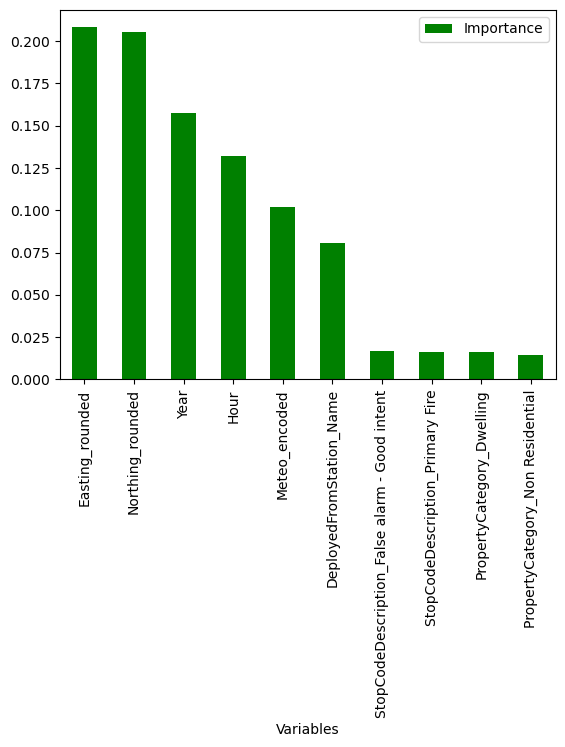

In [47]:
feat_importance = pd.DataFrame({'Variables' : X_train_multi.columns, 'Importance' : DC.feature_importances_}).sort_values(by = 'Importance', ascending = False)
feat_importance.nlargest(10, 'Importance').plot.bar('Variables', 'Importance', color = 'green');

#### Immpossibilité sur ce fichier de sortir la courbe ROC malgré plusieurs tentatives (laissé sur un autre fichier)

## Random Forest Classifier :

In [32]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=42)
RFC.fit(X_train_multi, y_train_multi)

RandomForestClassifier(random_state=42)

In [34]:
predictionRFC = RFC.predict(X_test_multi)
from sklearn.metrics import classification_report
display(pd.crosstab(y_test_multi, predictionRFC, rownames = ['Réalité'], colnames = ['Prediciton']))
print(classification_report(y_test_multi, predictionRFC))

Prediciton,4 à 5min,4min ou moins,5 à 6min30,6min30 à 13minutes
Réalité,,,,
4min ou moins,15287,53163,12737,7171
4 à 5min,19663,24293,18909,8671
5 à 6min30,15840,17668,30217,17754
6min30 à 13minutes,8124,11124,20127,27579


                    precision    recall  f1-score   support

          4 à 5min       0.33      0.27      0.30     71536
     4min ou moins       0.50      0.60      0.55     88358
        5 à 6min30       0.37      0.37      0.37     81479
6min30 à 13minutes       0.45      0.41      0.43     66954

          accuracy                           0.42    308327
         macro avg       0.41      0.41      0.41    308327
      weighted avg       0.42      0.42      0.42    308327



#### Impossibilité de sortir la courbe ROC et les features importance sur ce fichier (laissé sur un autre fichier) :

## XGBoost : 

In [38]:
# Nécessité d'encoder la variable cible pour ce modèle :
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_multi_nmbr = le.fit_transform(y_train_multi)
y_test_multi_nmbr = le.transform(y_test_multi)



In [40]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, eval_metric="logloss")
model.fit(X_train_multi, y_train_multi_nmbr)
predictionXGB = model.predict(X_test_multi)


In [41]:
print(classification_report(y_test_multi_nmbr, predictionXGB))
display(pd.crosstab(y_test_multi_nmbr, predictionXGB, rownames = ['Réalité'], colnames = ['Prediciton']))

              precision    recall  f1-score   support

           0       0.36      0.08      0.13     71536
           1       0.42      0.66      0.51     88358
           2       0.35      0.38      0.36     81479
           3       0.41      0.39      0.40     66954

    accuracy                           0.39    308327
   macro avg       0.38      0.38      0.35    308327
weighted avg       0.38      0.39      0.36    308327



Prediciton,0,1,2,3
Réalité,,,,
0,5613,34792,21046,10085
1,3882,58400,16083,9993
2,4397,28456,31248,17378
3,1644,17967,21553,25790
